In [21]:
# Import libraries
import pandas as pd
import joblib
import lightgbm as lgb
from sklearn.metrics import (
    roc_auc_score, f1_score, classification_report,
    confusion_matrix, RocCurveDisplay
)
import matplotlib.pyplot as plt

In [22]:
# Load processed data
X_train, X_test, y_train, y_test = joblib.load(r"C:\Users\Asus\Documents\GitHub\Credit-Scoring\output\models\processed_data_lgbm.pkl")
print("Train size:", X_train.shape, "Test size:", X_test.shape)

Train size: (452296, 64) Test size: (61503, 64)


In [23]:
# Caculate scale_pos_weight
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
print("scale_pos_weight =", round(scale_pos_weight, 2))

scale_pos_weight = 1.0


In [24]:
# Initialize LightGBM classifier and train the model
lgb_model = lgb.LGBMClassifier(
    n_estimators=800,
    learning_rate=0.03,
    num_leaves=63,
    max_depth=-1,
    min_data_in_leaf=50,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_weight,
    objective='binary',
    boosting_type='gbdt',
    random_state=42,
    n_jobs=-1
)

lgb_model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    eval_metric='auc'
)

print("Model training completed.")

[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Info] Number of positive: 226148, number of negative: 226148
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.076182 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13824
[LightGBM] [Info] Number of data points in the train set: 452296, number of used features: 57
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Model training completed.


In [25]:
# Evaluate model
y_pred = lgb_model.predict(X_test)
y_prob = lgb_model.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_prob)
f1 = f1_score(y_test, y_pred)

print(f"\n ROC-AUC: {roc_auc:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=3))

[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50

 ROC-AUC: 0.7048
F1 Score: 0.0253

Classification Report:
              precision    recall  f1-score   support

           0      0.920     0.998     0.957     56538
           1      0.371     0.013     0.025      4965

    accuracy                          0.919     61503
   macro avg      0.646     0.506     0.491     61503
weighted avg      0.876     0.919     0.882     61503



In [26]:
# COnfusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Pred 0', 'Pred 1'])
print("\nConfusion Matrix:")
print(cm_df)


Confusion Matrix:
          Pred 0  Pred 1
Actual 0   56428     110
Actual 1    4900      65


[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50


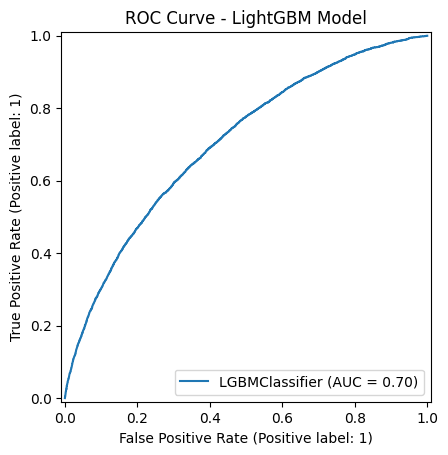

In [27]:
#ROC Curve
RocCurveDisplay.from_estimator(lgb_model, X_test, y_test)
plt.title("ROC Curve - LightGBM Model")
plt.show()

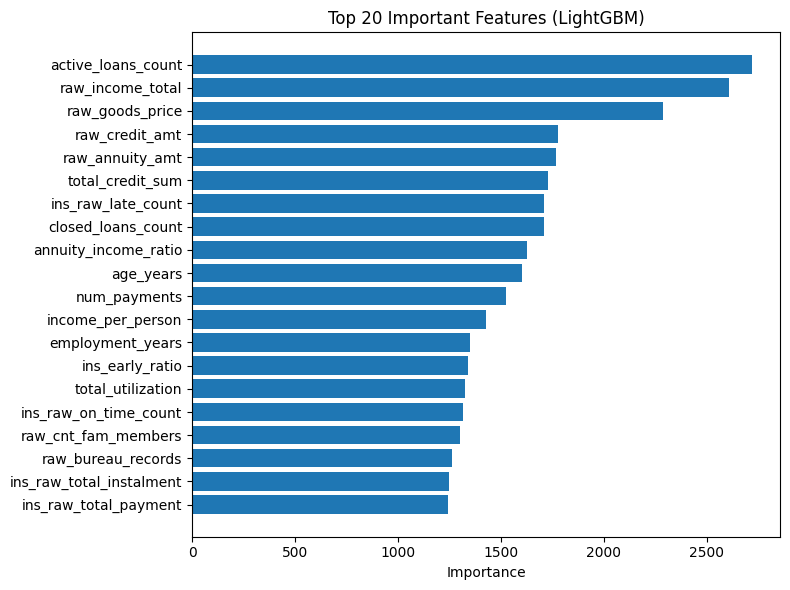

In [28]:
# Feature Importance
importance = pd.DataFrame({
    'feature': lgb_model.feature_name_,
    'importance': lgb_model.feature_importances_
}).sort_values(by='importance', ascending=False)

top20 = importance.head(20)

plt.figure(figsize=(8,6))
plt.barh(top20['feature'][::-1], top20['importance'][::-1])
plt.title("Top 20 Important Features (LightGBM)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

In [29]:
# save the model
joblib.dump(lgb_model, r"C:\Users\Asus\Documents\GitHub\Credit-Scoring\output\models\lightgbm_baseline_model.pkl")
print("Model saved successfully.")

Model saved successfully.
